In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
repos_info = pd.read_csv('repos_info.csv')
commit = pd.read_csv('commit_info.csv')

In [4]:
commit_count = pd.merge(repos_info,commit,on=['Id']).groupby('Id').size().reset_index()

In [5]:
commit_count.columns = ['Id', 'Commit count']

In [6]:
repos_info = pd.merge(repos_info,commit_count,on=['Id'],how = 'left')
#repos_info

Text(0.5,1,'Commits per repository')

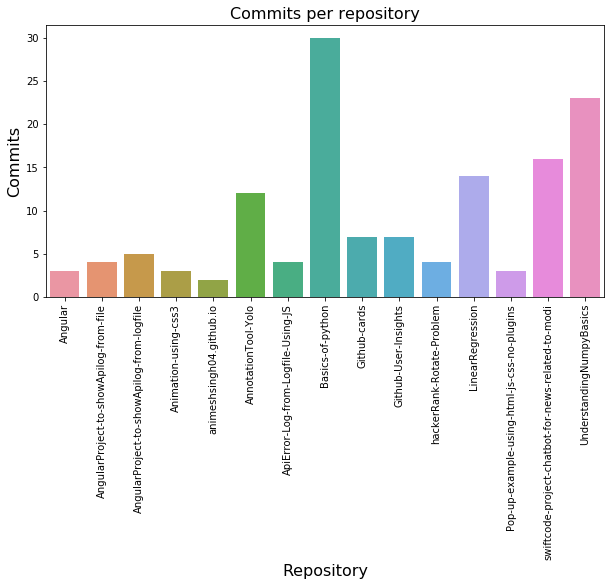

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(repos_info['Name'], repos_info['Commit count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

In [8]:
commit['Year'] = commit['Commited on'].apply(lambda x: x[:4])
commit_year = commit['Commited on'].apply(lambda x: x[:4]).value_counts()
commit_year.values

array([120,  16,   1], dtype=int64)

Text(0.5,1,'Commits per Year')

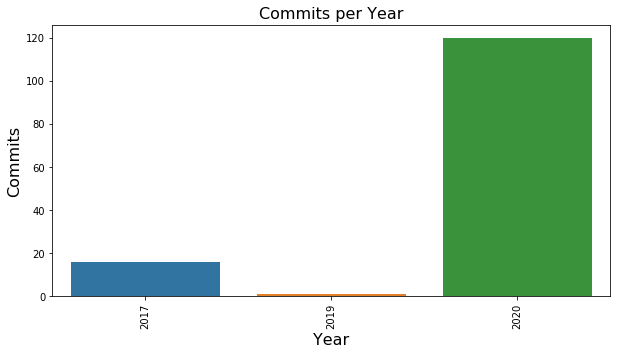

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(commit_year.index, commit_year.values)
plt.xticks(rotation = 90)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per Year", fontsize = 16)

# Commits Each Month 

In [10]:
commit['Month'] = commit['Commited on'].apply(lambda x: x[5:7])
monthly_commits = commit[commit['Year']=='2020'].groupby('Month').count()['Id']

In [11]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June',
                '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'Novmeber', '12': 'December'
               }

In [12]:
labels = []
for value in monthly_commits.index:
    labels.append(month_mapper[value])

Text(0.5,1,'Commits per Month')

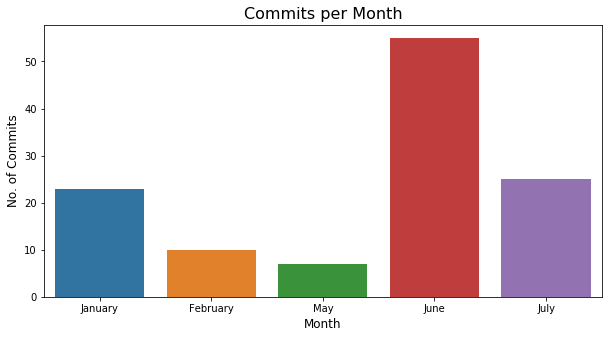

In [13]:
plt.figure(figsize = (10,5))
plot = sns.barplot(monthly_commits.index, monthly_commits.values)
plot.set_xticklabels(labels)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Commits per Month", fontsize = 16)

# Commits Each Day of the Month

In [14]:
commit['Date'] = commit['Commited on'].apply(lambda x: x[0:10])
Daily_commits = commit[(commit['Year']=='2020')].groupby('Date').size()

In [15]:
date_labels=[]
for value in Daily_commits.index:
    date_labels.append(value)

Text(0.5,1,'Daily Commits on Each Day of 2020')

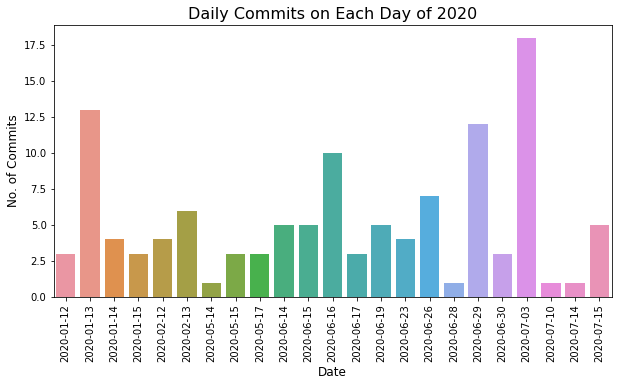

In [17]:
plt.figure(figsize = (10,5))
plot = sns.barplot(Daily_commits.index, Daily_commits.values)
plot.set_xticklabels(date_labels)
plt.xticks(rotation = 90)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Daily Commits on Each Day of 2020", fontsize = 16)

# Most Language used

In [102]:
data = []
language_list = repos_info['Language'].str.split(',')
for i in range(len(language_list)):
    data = data + language_list[i]
for i,item in enumerate(data):
    data[i] = item.strip()

In [103]:
languages = pd.DataFrame(data,columns=['Language'])
languages = languages.groupby('Language').size()
languages

Language
CSS                  7
HTML                10
Java                 1
JavaScript           9
Jupyter Notebook     5
Python               1
Scala                1
TypeScript           1
dtype: int64

Text(0.5,1,'Language distribution among all the Repositories')

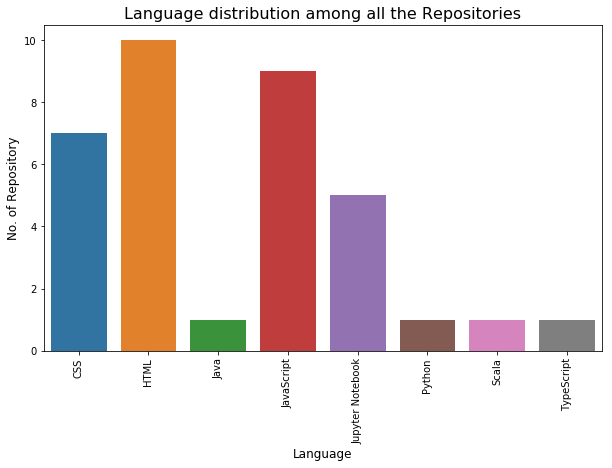

In [106]:
plt.figure(figsize = (10,6))
plot = sns.barplot(languages.index, languages.values)
plt.xticks(rotation = 90)
plt.xlabel("Language", fontsize = 12)
plt.ylabel("No. of Repository", fontsize = 12)
plt.title("Language distribution among all the Repositories", fontsize = 16)